In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [4]:
img=tf.keras.preprocessing.image.load_img(r"C:\Users\hp\Downloads\archive (1)\test\Apple_rust_leaf\test_Apple rust leaf_5.jpg")

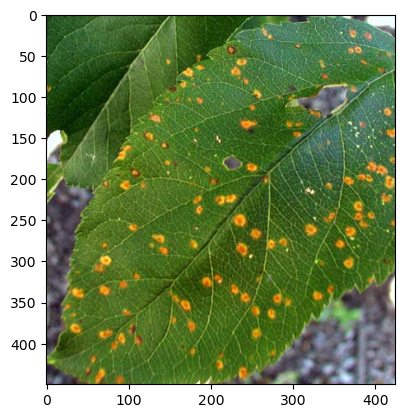

In [5]:
plt.imshow(img)

In [6]:
cv2.imread(r"C:\Users\hp\Downloads\archive (1)\test\Apple_rust_leaf\test_Apple rust leaf_5.jpg").shape

(450, 424, 3)

In [7]:
cv2.imread(r"C:\Users\hp\Downloads\archive (1)\test\Apple_rust_leaf\test_Apple rust leaf_5.jpg")

array([[[  8,  52,  16],
        [ 13,  57,  21],
        [ 31,  75,  39],
        ...,
        [255, 254, 244],
        [255, 254, 244],
        [255, 254, 244]],

       [[ 14,  58,  22],
        [ 18,  62,  26],
        [ 32,  76,  40],
        ...,
        [255, 254, 244],
        [255, 254, 244],
        [255, 254, 244]],

       [[ 28,  72,  36],
        [ 29,  73,  37],
        [ 36,  80,  43],
        ...,
        [255, 254, 244],
        [255, 254, 244],
        [255, 254, 244]],

       ...,

       [[120,  93, 103],
        [120,  93, 102],
        [118,  94, 102],
        ...,
        [205, 185, 160],
        [216, 195, 168],
        [225, 203, 175]],

       [[105,  75,  88],
        [108,  81,  91],
        [109,  84,  94],
        ...,
        [200, 181, 160],
        [219, 195, 173],
        [230, 203, 182]],

       [[107,  77,  90],
        [106,  78,  91],
        [104,  76,  89],
        ...,
        [200, 180, 162],
        [219, 194, 174],
        [232, 202, 183]]

In [9]:
train = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input)

In [10]:
train_ds=train.flow_from_directory(r"C:\Users\hp\Downloads\archive (1)\train",
                                   target_size=(224,224),
                                   batch_size=32,
                                   shuffle=True,
                                   class_mode="categorical")
test_ds=test.flow_from_directory(r"C:\Users\hp\Downloads\archive (1)\test",
                                   target_size=(224,224),
                                   batch_size=32,
                                   class_mode="categorical")

Found 2356 images belonging to 28 classes.
Found 237 images belonging to 27 classes.


In [11]:
train_ds.class_indices

{'Apple_Scab_Leaf': 0,
 'Apple_leaf': 1,
 'Apple_rust_leaf': 2,
 'Bell_pepper_leaf': 3,
 'Bell_pepper_leaf_spot': 4,
 'Blueberry_leaf': 5,
 'Cherry_leaf': 6,
 'Corn_Gray_leaf_spot': 7,
 'Corn_leaf_blight': 8,
 'Corn_rust_leaf': 9,
 'Peach_leaf': 10,
 'Potato_leaf_early_blight': 11,
 'Potato_leaf_late_blight': 12,
 'Raspberry_leaf': 13,
 'Soyabean_leaf': 14,
 'Squash_Powdery_mildew_leaf': 15,
 'Strawberry_leaf': 16,
 'Tomato_Early_blight_leaf': 17,
 'Tomato_Septoria_leaf_spot': 18,
 'Tomato_leaf': 19,
 'Tomato_leaf_bacterial_spot': 20,
 'Tomato_leaf_late_blight': 21,
 'Tomato_leaf_mosaic_virus': 22,
 'Tomato_leaf_yellow_virus': 23,
 'Tomato_mold_leaf': 24,
 'Tomato_two_spotted_spider_mites_leaf': 25,
 'grape_leaf': 26,
 'grape_leaf_black_rot': 27}

In [12]:
train_ds.classes

array([ 0,  0,  0, ..., 27, 27, 27])

In [13]:
resnet=tf.keras.applications.ResNet50(input_shape=[224,224,3],weights="imagenet",include_top=False)

In [14]:
for layer in resnet.layers:
    layer.trainable=False

In [18]:
x=resnet.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
prediction=tf.keras.layers.Dense(28,activation="softmax")(x)
model=tf.keras.models.Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,645,084 (90.20 MB)

 Trainable params: 57,372 (224.11 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])